# Лабораторная работа 4: Решающие деревья

### Брасалес Сарасбати, НПМ-01-22

In [1]:
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

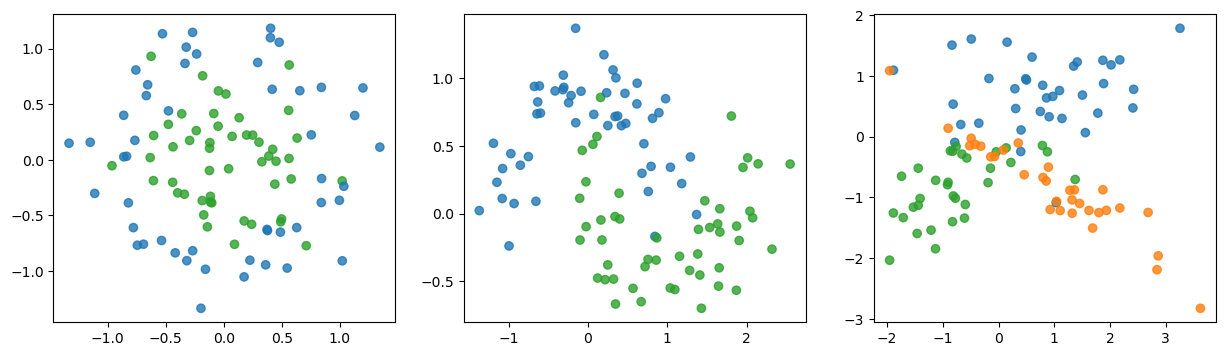

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

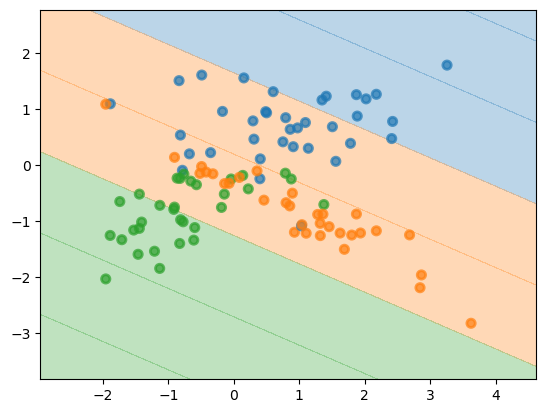

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
  Training accuracy: 1.00
  Test accuracy: 0.73
Dataset 2:
  Training accuracy: 1.00
  Test accuracy: 0.87
Dataset 3:
  Training accuracy: 1.00
  Test accuracy: 0.83


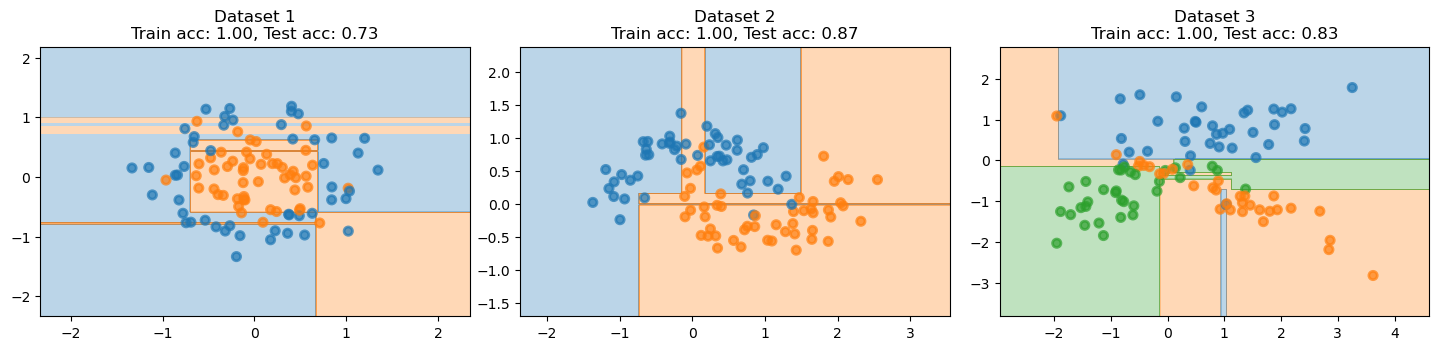

In [7]:
plt.figure(figsize=(15, 4))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    print(f"Dataset {i+1}:")
    print(f"  Training accuracy: {train_accuracy:.2f}")
    print(f"  Test accuracy: {test_accuracy:.2f}")
    
    plt.subplot(1, 3, i + 1)
    plot_surface(clf, X, y)
    plt.title(f"Dataset {i+1}\nTrain acc: {train_accuracy:.2f}, Test acc: {test_accuracy:.2f}")

__Ответ:__

Для каждого обучающего набора точность является высокой, но для тестовых наборов она ниже. У нас также наблюдается переобучение, так как поверхность разделения строится почти для всех точек.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [8]:
max_depth_values = [3, 5, 10]
min_samples_leaf_values = [1, 5, 10]

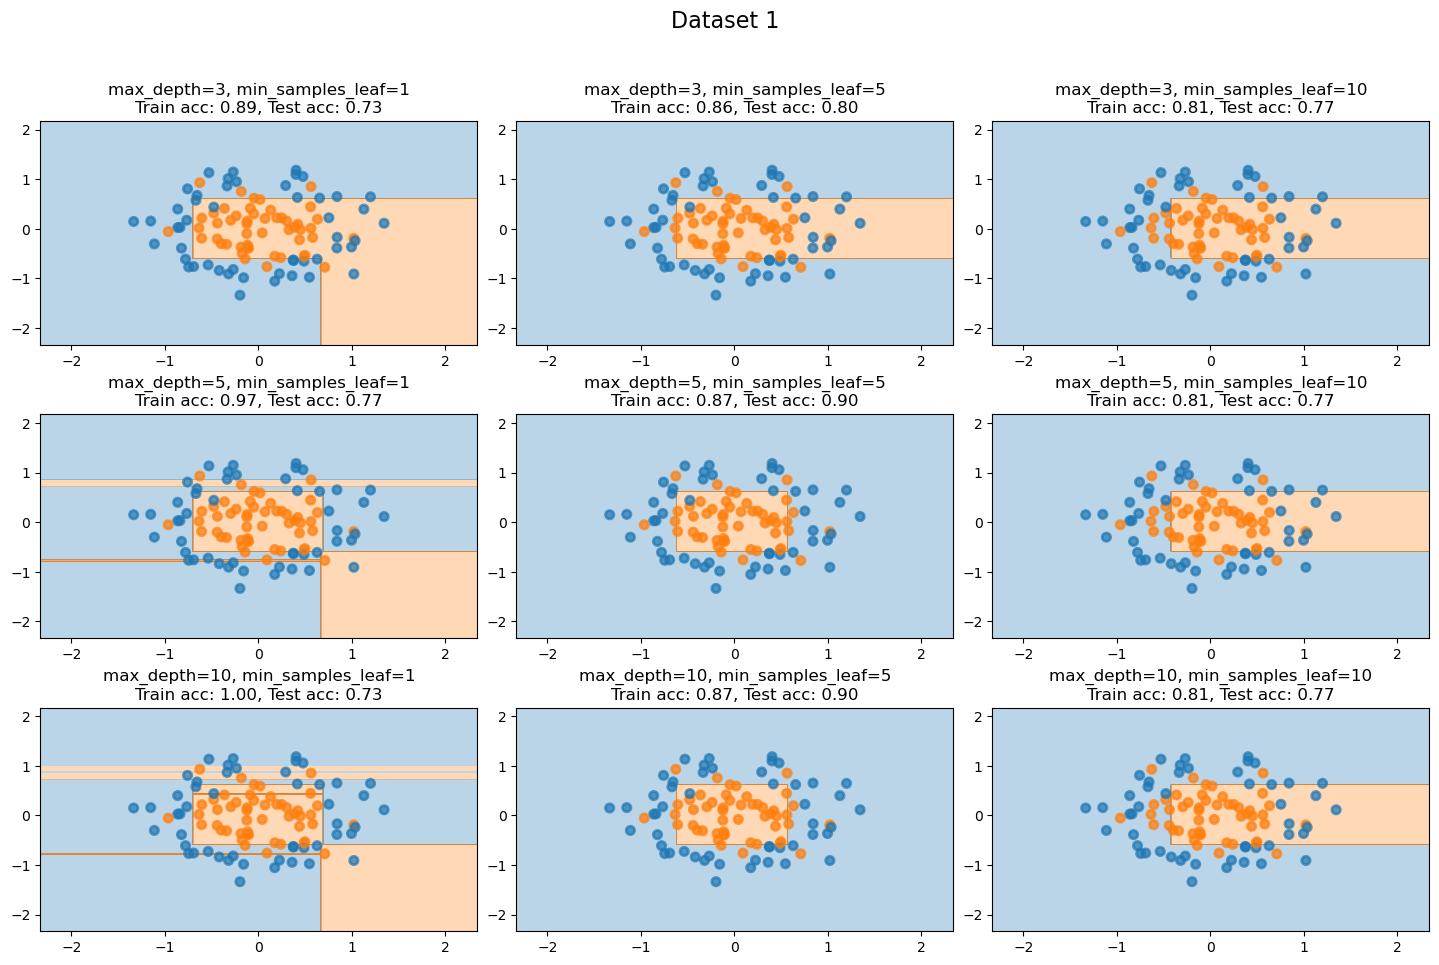

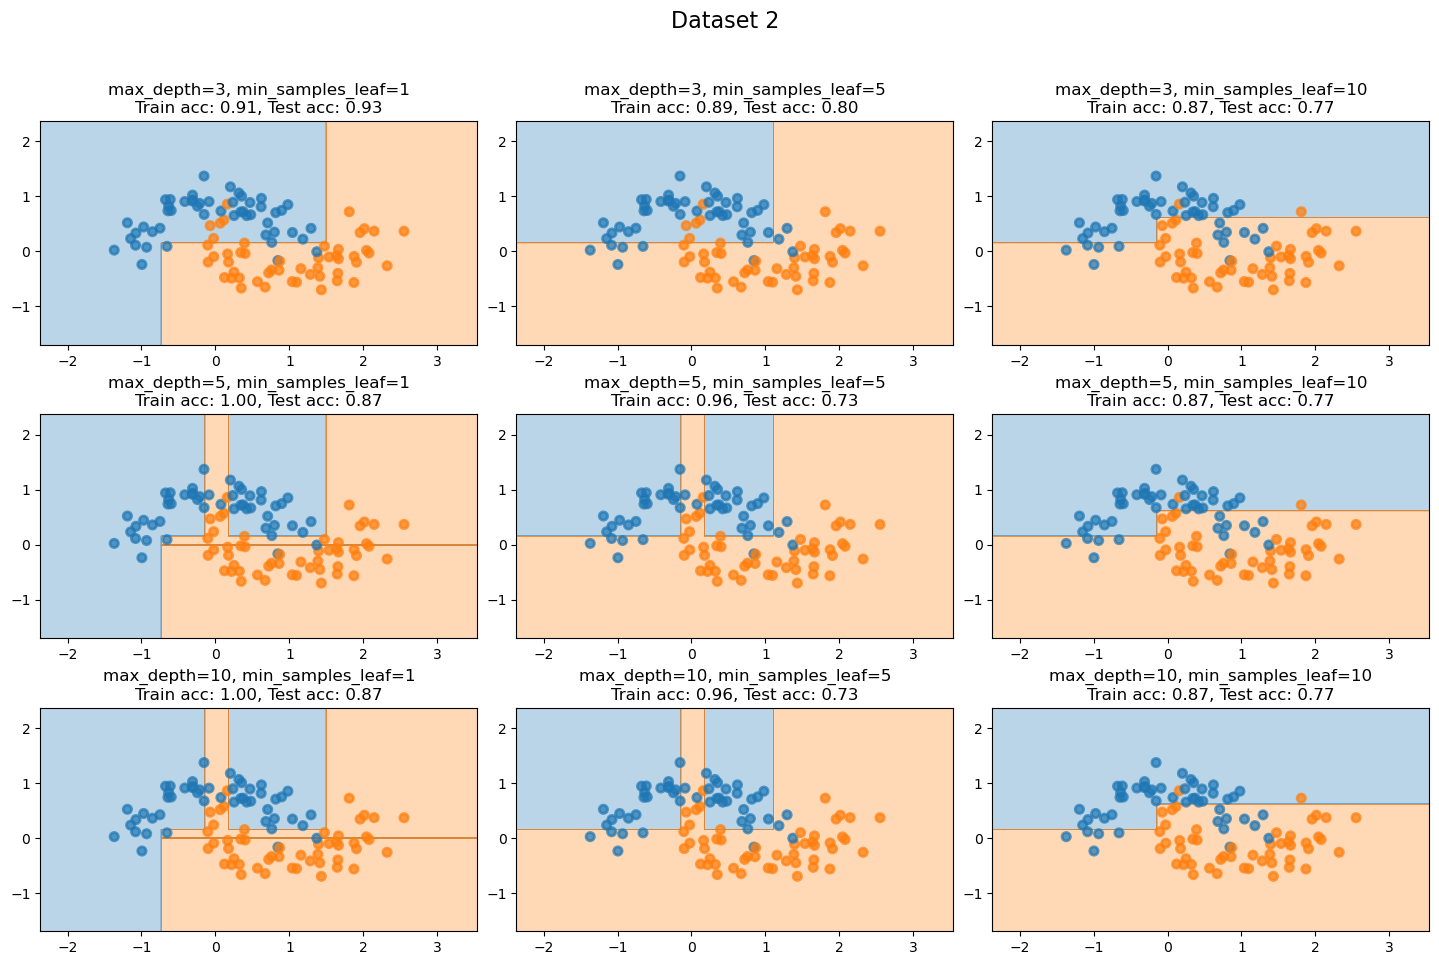

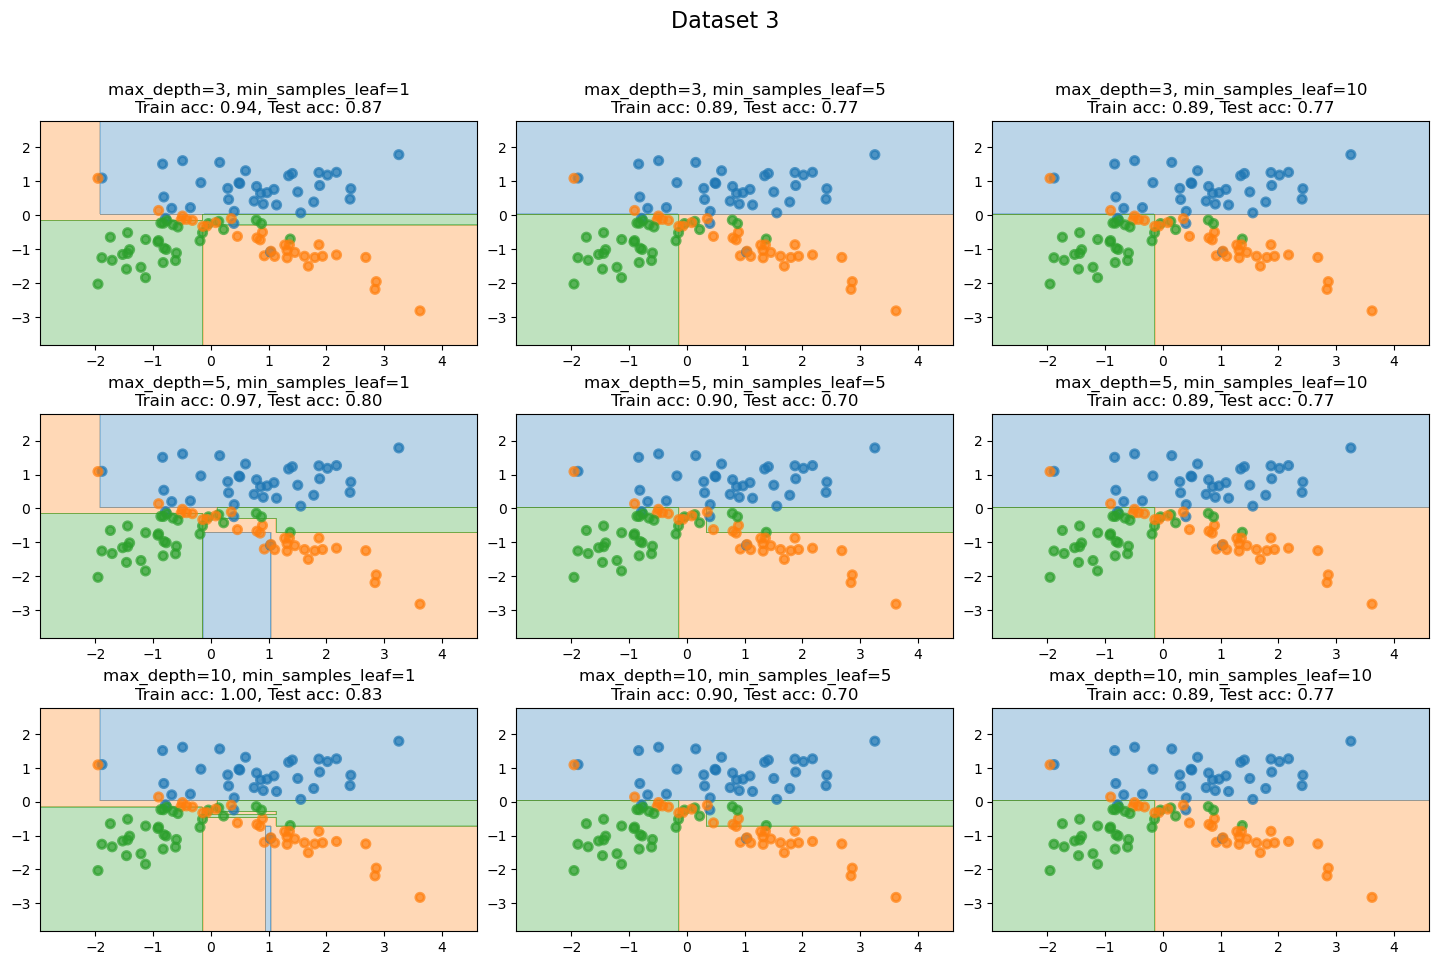

In [9]:
for dataset_idx, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    fig, axes = plt.subplots(len(max_depth_values), len(min_samples_leaf_values), figsize=(15, 10))
    fig.suptitle(f"Dataset {dataset_idx + 1}", fontsize=16)
    
    for i, max_depth in enumerate(max_depth_values):
        for j, min_samples_leaf in enumerate(min_samples_leaf_values):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)
            
            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            test_accuracy = accuracy_score(y_test, clf.predict(X_test))
        
            plt.sca(axes[i, j])
            plot_surface(clf, X, y)
            plt.title(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}\n"
                      f"Train acc: {train_accuracy:.2f}, Test acc: {test_accuracy:.2f}")

__Ответ:__

Если глубина высокая (в нашем примере max_depth=10) и минимальное количество образцов на листе низкое (min_samples_leaf=1), то поверхность разделения приводит к переобучению, так как модель начинает подгоняться под каждый отдельный пример. Пример: в наборе данных 3 можно заметить явное переобучение из-за распределения классов.

В случае, когда глубина низкая и больше образцов на листе (max_depth=3, min_samples_leaf=10), поверхность разделения становится проще и менее подогнанной к данным, что улучшает обобщение. Однако это снижает точность на обучающем наборе, так как модель становится менее детализированной. Пример: в наборе данных 1 мы видим, что точность (accuracy) является одной из самых низких.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [10]:
def find_best_split(feature_vector, target_vector):
    sorted_indices = np.argsort(feature_vector)  
    feat_sorted = feature_vector[sorted_indices]  
    target_sorted = target_vector[sorted_indices] 

    thresholds = (feat_sorted[1:] + feat_sorted[:-1]) / 2
    mask = feat_sorted[1:] != feat_sorted[:-1]
    thresholds = thresholds[mask]

    R = len(target_sorted)
    left_size = np.arange(1, R)

    left_counts = np.cumsum(target_sorted)
    p1_left = left_counts[:-1] / left_size
    p0_left = 1 - p1_left

    right_counts = left_counts[-1] - left_counts[:-1]
    right_size = R - left_size
    p1_right = right_counts / right_size
    p0_right = 1 - p1_right

    gini_left = p0_left ** 2 + p1_left ** 2 - 1
    gini_right = p0_right ** 2 + p1_right ** 2 - 1
    ginis = (left_size / R) * gini_left + (right_size / R) * gini_right
    ginis = ginis[mask]

    if ginis.size == 0:
        return None, None, None, None

    best_index = np.argmax(ginis)
    gini_best = ginis[best_index]
    threshold_best = thresholds[best_index]

    return thresholds, ginis, threshold_best, gini_best

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
import pandas as pd
students= pd.read_csv('students.csv')

In [12]:
students.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [13]:
target = students[' UNS'] 
features = students.drop(columns = ' UNS') 

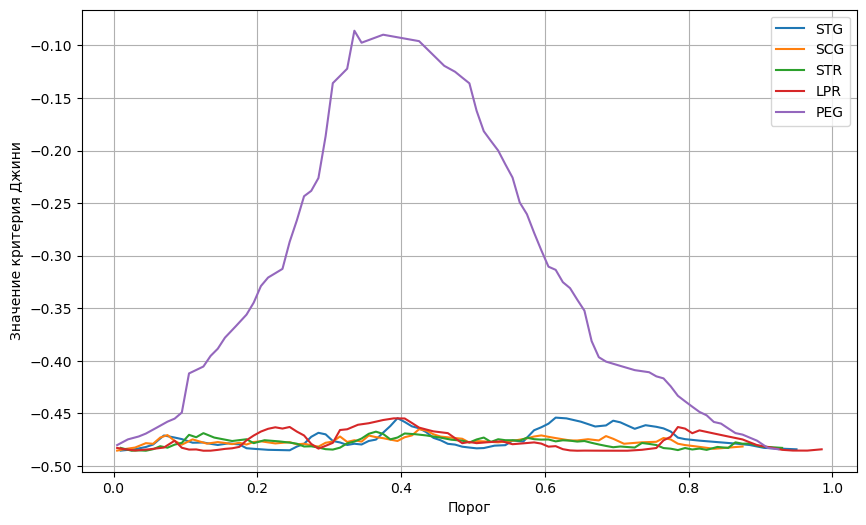

In [14]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')

for column in features.columns:
    thr, gini, thr_best, gini_best = find_best_split(features[column].values, target.values)
    plt.plot(thr, gini, label=column)
plt.legend()

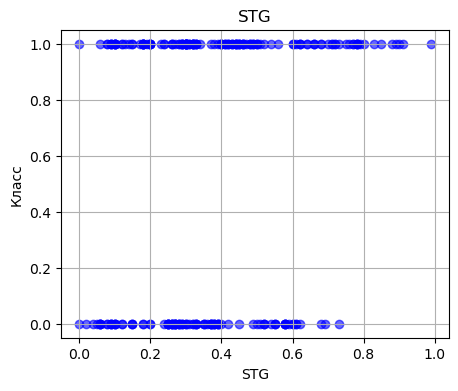

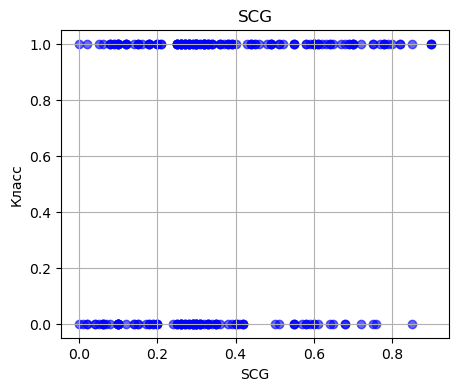

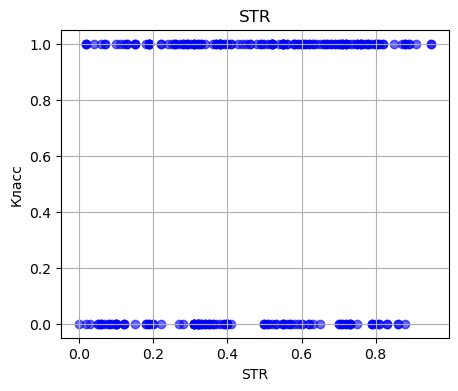

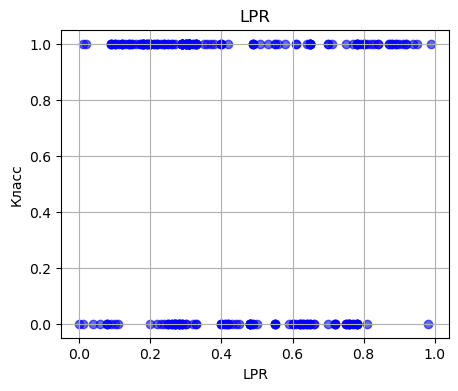

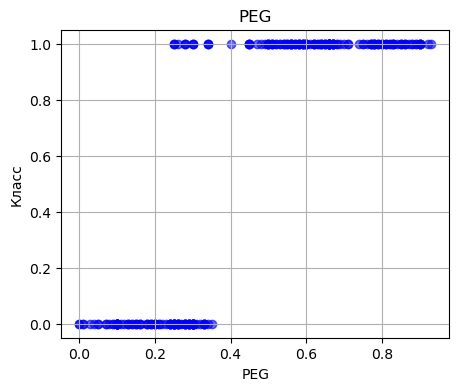

In [15]:
for feature in features:
    plt.figure(figsize=(5, 4))
    plt.scatter(students[feature], target, alpha=0.6, color='b')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Класс')
    plt.grid(True)

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Следует выбрать характеристику PEG, так как она имеет самый высокий пик на своей кривой. Мы можем наблюдать, что характеристика PEG демонстрирует наиболее четкое разделение на своем графике распределения, что соответствует кривой PEG в критерии Джини.

"Хорошие" характеристики имеют максимум, что указывает на наличие идеального порога для наилучшего разделения набора данных. Характеристики, которые не позволяют добиться хорошего разделения, будут иметь более плоские и менее выраженные кривые, колеблющиеся вокруг одного значения.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [16]:
from collections import Counter
from sklearn.base import BaseEstimator

In [17]:
class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def get_params(self, deep=True):
        return {
            'feature_types': self.feature_types,
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'min_samples_leaf': self.min_samples_leaf
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def _fit_node(self, sub_X, sub_y, node):
        # Convertir sub_X y sub_y a arrays de NumPy
        sub_X = np.array(sub_X)
        sub_y = np.array(sub_y)

        # Condición de parada si todas las etiquetas son iguales
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self.feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    current_click = clicks[key] if key in clicks else 0
                    ratio[key] = current_click / current_count if current_count != 0 else 0
                sorted_categories = [x[0] for x in sorted(ratio.items(), key=lambda x: x[1])]
                categories_map = dict(zip(sorted_categories, range(len(sorted_categories))))
                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError("Invalid feature type")

            if len(feature_vector) < 2:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini is not None and (gini_best is None or gini < gini_best):
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [key for key, val in categories_map.items() if val < threshold]
                else:
                    raise ValueError("Invalid feature type")

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        if self.feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self.feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError("Invalid feature type")

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_split = node["feature_split"]
        if self.feature_types[feature_split] == "real":
            if x[feature_split] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif self.feature_types[feature_split] == "categorical":
            if x[feature_split] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            raise ValueError("Invalid feature type")

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        X = np.array(X)  
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [18]:
path = "~/Downloads/agaricus-lepiota.data"  
mushrooms= pd.read_csv(path)

In [19]:
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
mushrooms = mushrooms.apply(LabelEncoder().fit_transform)
target_mushrooms = mushrooms.iloc[:, 0]
features_mushrooms = mushrooms.iloc[:, 1:]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(features_mushrooms.values, target_mushrooms.values, test_size=0.5, random_state=127)

feature_types = ['categorical'] * x_train.shape[1]
my_tree = DecisionTree(feature_types)
my_tree.fit(x_train, y_train)

y_pred_test = my_tree.predict(x_test)
print('test accuracy =', np.mean(y_pred_test == y_test))
y_pred_train = my_tree.predict(x_train)
print('train accuracy =', np.mean(y_pred_train == y_train))

def calculate_depth(node):
    if node.get("type") == "terminal":
        return 1
    left_depth = calculate_depth(node["left_child"]) if "left_child" in node else 0
    right_depth = calculate_depth(node["right_child"]) if "right_child" in node else 0
    return 1 + max(left_depth, right_depth)

tree_depth = calculate_depth(my_tree._tree)
print('tree depth =', tree_depth)

test accuracy = 0.9906450024618415
train accuracy = 1.0
tree depth = 21


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
<!--- * [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)-->
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [23]:
path1 = "~/Downloads/car.data"  
car= pd.read_csv(path1)

In [24]:
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [26]:
car.iloc[:, -1] = car.iloc[:, -1].apply(lambda x: 0 if x in ["unacc", "acc"] else 1)
car = car.apply(LabelEncoder().fit_transform)
target_cars = car.iloc[:, -1]
features_cars = car.iloc[:, :-1]

C:\Users\saras\AppData\Local\Temp\ipykernel_29136\116452559.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  car.iloc[:, -1] = car.iloc[:, -1].apply(lambda x: 0 if x in ["unacc", "acc"] else 1)


In [27]:
path2 = "~/Downloads/nursery.data"  
nursery= pd.read_csv(path2)

In [28]:
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [29]:
nursery.iloc[:, -1] = nursery.iloc[:, -1].apply(lambda x: 0 if x in ["not_recom", "recommend"] else 1)
nursery = nursery.apply(LabelEncoder().fit_transform)
target_nursery = nursery.iloc[:, -1]
features_nursery = nursery.iloc[:, :-1]

C:\Users\saras\AppData\Local\Temp\ipykernel_29136\2136031372.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  nursery.iloc[:, -1] = nursery.iloc[:, -1].apply(lambda x: 0 if x in ["not_recom", "recommend"] else 1)


In [30]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [31]:
def evaluate_models(features, target, dataset_name):
    results = {}

    feature_types_real = ['real'] * features.shape[1]
    dt_real = DecisionTree(feature_types=feature_types_real)
    accuracy_real = cross_val_score(dt_real, features, target, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTree (real)'] = np.mean(accuracy_real)

    feature_types_cat = ['categorical'] * features.shape[1]
    dt_cat = DecisionTree(feature_types=feature_types_cat)
    accuracy_cat = cross_val_score(dt_cat, features, target, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTree (categorical)'] = np.mean(accuracy_cat)
    
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    features_one_hot = one_hot_encoder.fit_transform(features)
    dt_one_hot = DecisionTree(feature_types=['real'] * features_one_hot.shape[1])
    accuracy_one_hot = cross_val_score(dt_one_hot, features_one_hot, target, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTree (one-hot)'] = np.mean(accuracy_one_hot)

    dt_sklearn = DecisionTreeClassifier()
    accuracy_sklearn = cross_val_score(dt_sklearn, features, target, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTreeClassifier (sklearn)'] = np.mean(accuracy_sklearn)

    results_df = pd.DataFrame(results, index=[dataset_name])
    return results_df


In [32]:
mushrooms_results = evaluate_models(features_mushrooms, target_mushrooms, 'mushrooms')


In [33]:
cars_results = evaluate_models(features_cars, target_cars, 'cars')

In [34]:
nursery_results = evaluate_models(features_nursery, target_nursery, 'nursery')


In [35]:
final_results = pd.concat([mushrooms_results, cars_results, nursery_results])
final_results

,DecisionTree (real),DecisionTree (categorical),DecisionTree (one-hot),DecisionTreeClassifier (sklearn)
mushrooms,0.991877,0.988557,0.965672,0.962723
cars,0.937313,0.908533,0.919263,0.944371
nursery,0.998688,0.998534,0.999228,0.999846


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Несмотря на то, что алгоритмы показывают достаточно высокую точность, нельзя сказать, что они классифицируют одинаково. Разные алгоритмы работают лучше в зависимости от набора данных и его характеристик. В наборах данных, таких как mushrooms, где признаки по своей природе категориальные, категориальная версия дерева решений работает хорошо, так как она использует оригинальное представление данных. В наборах данных, таких как cars и nursery, one-hot кодирование и версия дерева решений из scikit-learn лучше справляются с обработкой взаимосвязей между признаками.

В результатах присутствует компонент случайности, так как использование кросс-валидации подразумевает случайное разбиение данных при каждом запуске. Чтобы контролировать случайность, можно задать фиксированный параметр random_state во всех экземплярах cross_val_score.